In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import re
from imp import reload
import h5py
import sys

In [2]:
import deltascope as cranium
import deltascope.alignment as ut

In [3]:
at = ".\\data\\22hpf\\AT\\Prob"
zrf = ".\\data\\22hpf\\Gfap\\Prob"

In [4]:
outdir = ".\\data\\22hpf\\Output-02-14-2019"

In [5]:
os.mkdir(outdir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: '.\\data\\22hpf\\Output-09-15'

In [6]:
Dat = {}
for f in os.listdir(at):
    if 'h5' in f:
        num  = re.findall(r'\d+',f.split('.')[0])[-1]
        Dat[num] = os.path.join(at,f)

In [7]:
Dzrf = {}
for f in os.listdir(zrf):
    if 'h5' in f:
        num  = re.findall(r'\d+',f.split('.')[0])[-1]
        Dzrf[num] = os.path.join(zrf,f)

In [8]:
Dbat = {}

In [9]:
Dbzrf = {}

# Data Preprocessing

In [10]:
klist = Dat.keys()

In [11]:
param = {
    'gthresh':0.5,
    'scale':[1,1,1],
    'microns':[0.16,0.16,0.21],
    'mthresh':0.8,
    'radius':10,
    'comp_order':[0,2,1],
    'fit_dim':['x','z'],
    'deg':2
}

In [12]:
for k in klist:
    try:
        Dbat[k] = ut.preprocess(Dat[k],param)
        Dbzrf[k] = ut.preprocess(Dzrf[k],param,pca=Dbat[k].pcamed,mm=Dbat[k].mm,vertex=Dbat[k].vertex)
        print(k)
    except:
        print(k,'failed')
        e = sys.exc_info()
        print(e)

C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


10


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


12


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


13


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


14


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


1


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


2


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


3


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


4


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


5


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


6


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


7


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


8


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


9


# Functions

In [13]:
def start(k):
    return(ut.start(k,Dbat,[Dbzrf],im=True))
def save_at(k,df):
    ut.save_at(k,df,outdir,'22hpf')
def save_both(k,dfa,dfb):
    ut.save_both(k,dfa,dfb,outdir,'22hpf')

In [14]:
def fit_model(axi,df,mm=None):
    if mm == None:
        mm = np.polyfit(df.x,df.z,2)
    p = np.poly1d(mm)
    xrange = np.arange(np.min(df.x),np.max(df.x))
    axi.plot(xrange,p(xrange),c='m')
    return(mm)

In [15]:
model = pd.DataFrame({'a':[],'b':[],'c':[]})
def save_model(k,mm,model):
    row = pd.Series({'a':mm[0],'b':mm[1],'c':mm[2]},name=k)
    model = model.append(row)
    return(model)

In [16]:
def pick_pts(x1,z1,vx,vz,x2,z2):
    pts = pd.DataFrame({'x':[x1,vx,x2],'z':[z1,vz,z2]})
    return(pts)

In [17]:
klist

dict_keys(['10', '12', '13', '14', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [18]:
Dbzrf.keys()

dict_keys(['10', '12', '13', '14', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# 14

In [19]:
Dbat['14']

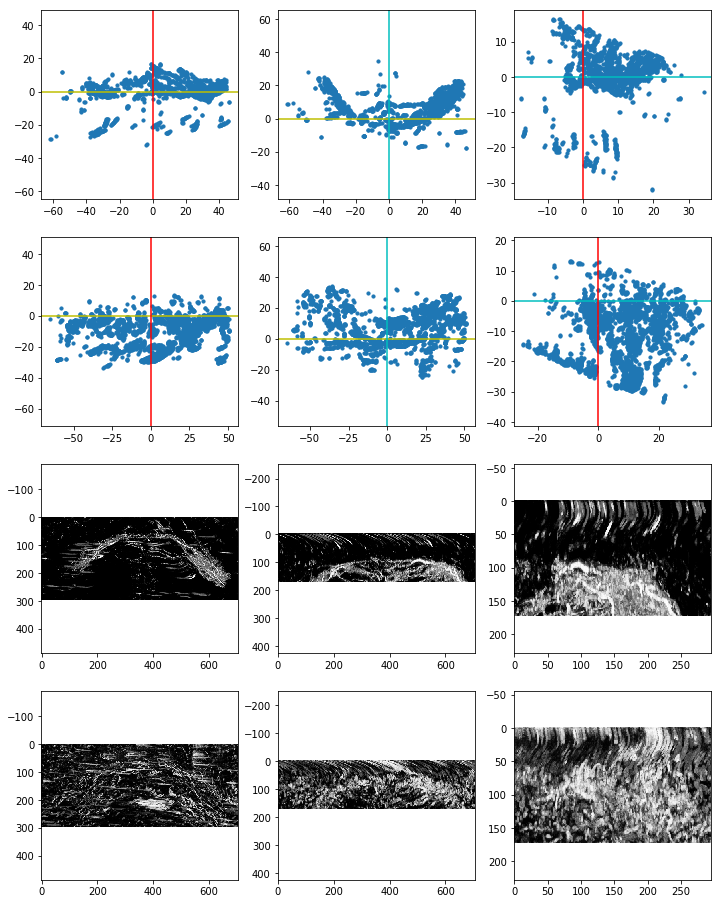

In [20]:
k,df,Ldf,ax = start('14')

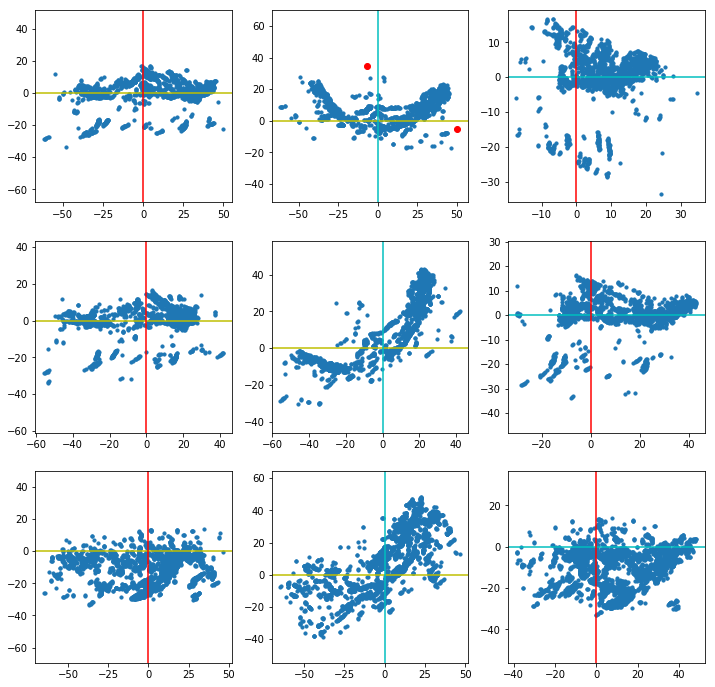

In [21]:
df1,Ldf1,pts,ax = ut.check_pts(df,Ldf,'z')

In [22]:
pts.iloc[0].x = -40
pts.iloc[0].z = 26
pts.iloc[1].x = 45
pts.iloc[1].z = 22
ax[0,1].scatter(pts.x,pts.z,c='y')
pts

x     z
0 -40.0  26.0
1  45.0  22.0

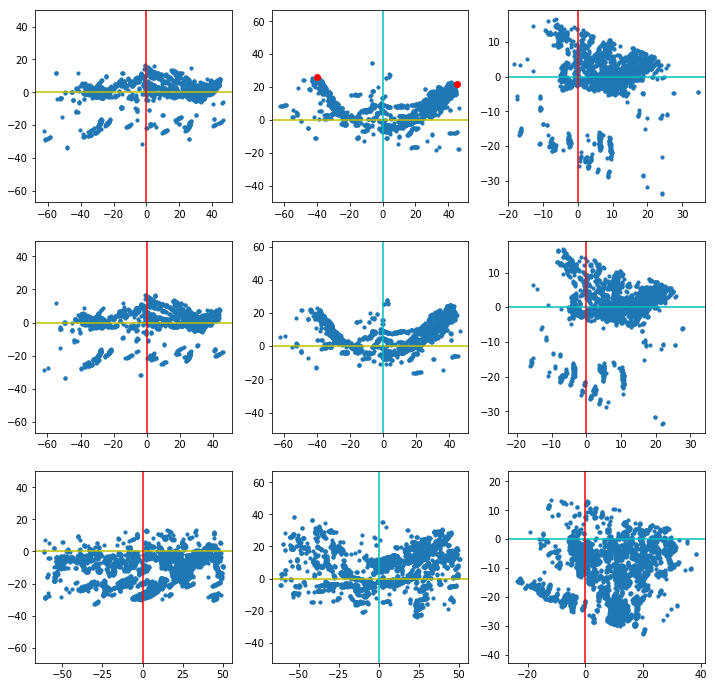

In [23]:
df2,Ldf2,ax = ut.revise_pts(df,Ldf,'z',pts=pts)

In [24]:
mm = fit_model(ax[1,1],df2)

In [25]:
pts = pick_pts(-40,26,0,-5,45,22)
ax[1,1].scatter(pts.x,pts.z,c='m')

In [26]:
pts = pick_pts(-43,26,0,-5,45,22)

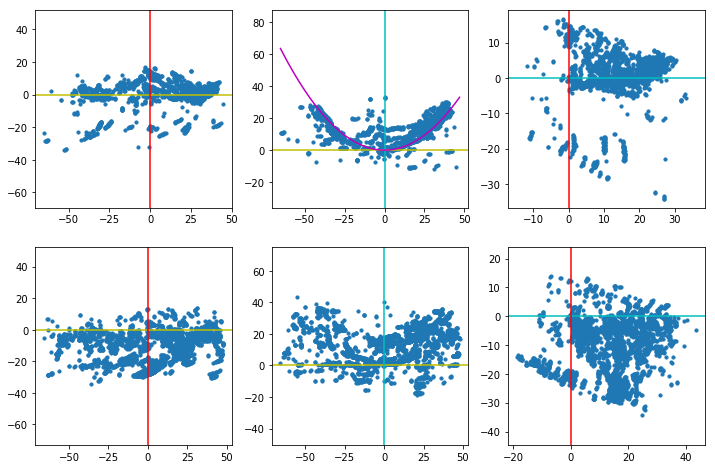

In [27]:
df3,Ldf3,mm,ax = ut.ch_vertex(df2,Ldf2,pts=pts)

In [28]:
model = save_model(k,mm,model)

In [29]:
save_both(k,df3,Ldf3[0])

Write to .\data\22hpf\Output-09-15\AT_14_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_14_22hpf.psi complete


# 8

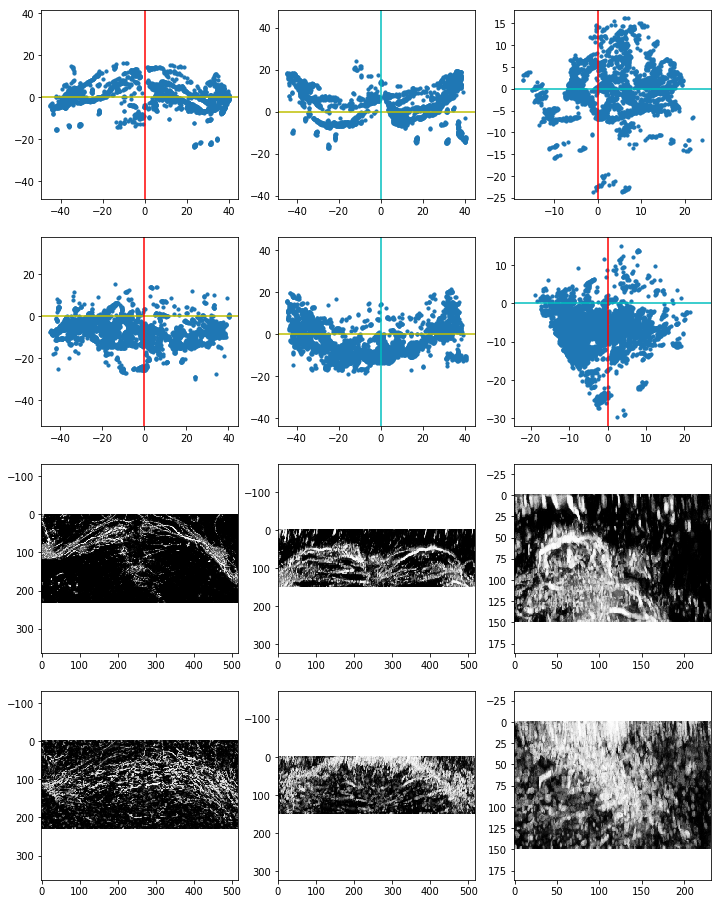

In [30]:
k,df,Ldf,ax = start('8')

In [31]:
mm = fit_model(ax[1,1],df)

In [32]:
model = save_model(k,mm,model)

In [33]:
save_both(k,df,Ldf[0])

Write to .\data\22hpf\Output-09-15\AT_8_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_8_22hpf.psi complete


# 6

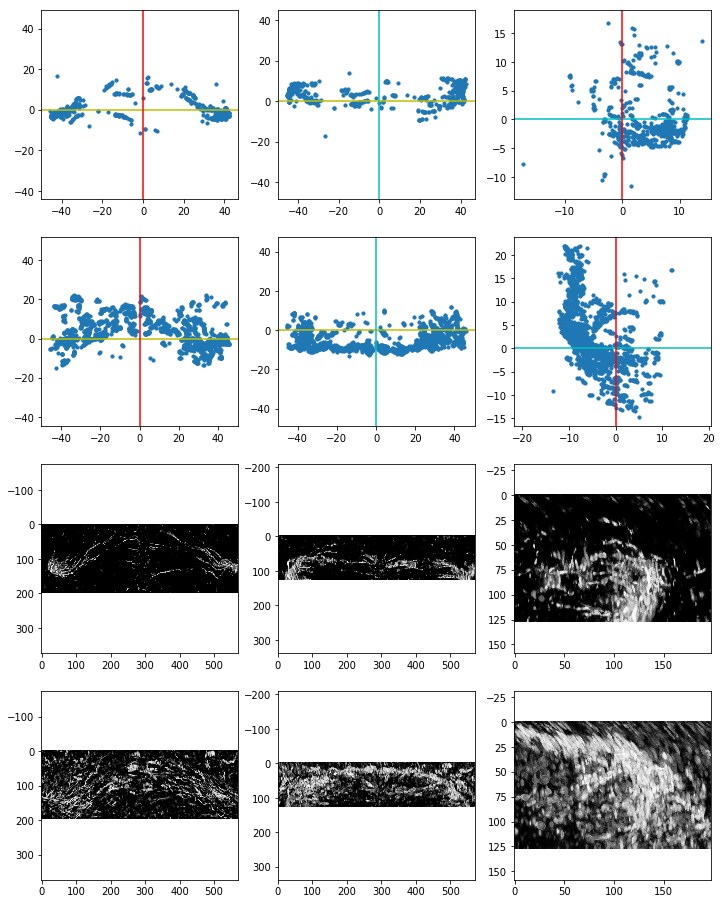

In [34]:
k,df,Ldf,ax = start('6')

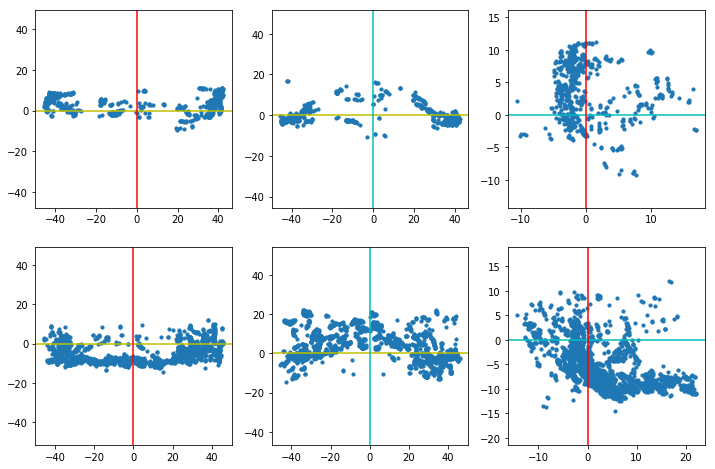

In [35]:
df1,Ldf1 = ut.zyswitch(df,Ldf)
ax = ut.make_graph([df1]+Ldf1)

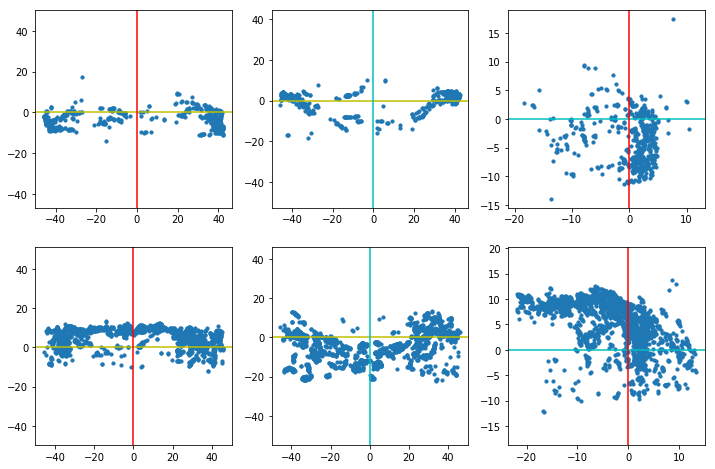

In [36]:
df2,Ldf2 = ut.flip(df1,Ldf1)
ax = ut.make_graph([df2]+Ldf2)

In [37]:
mm = fit_model(ax[0,1],df2)

In [38]:
pts = pick_pts(-42,4,0,-15,40,5)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

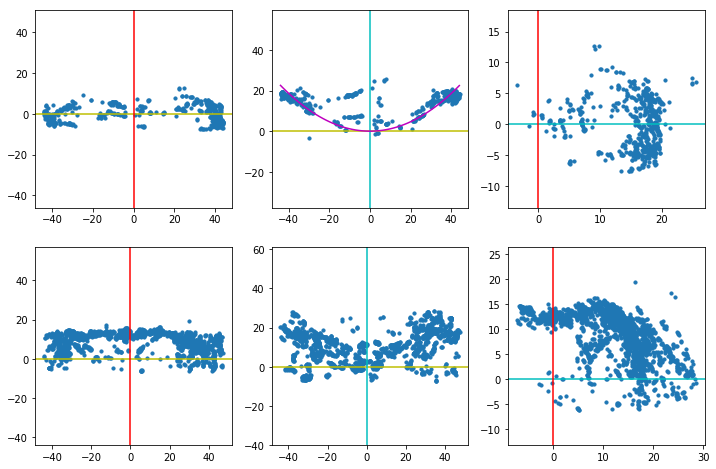

In [39]:
df3,Ldf3,mm,ax = ut.ch_vertex(df2,Ldf2,pts=pts)

In [40]:
model = save_model(k,mm,model)
save_both(k,df3,Ldf3[0])

Write to .\data\22hpf\Output-09-15\AT_6_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_6_22hpf.psi complete


# 10

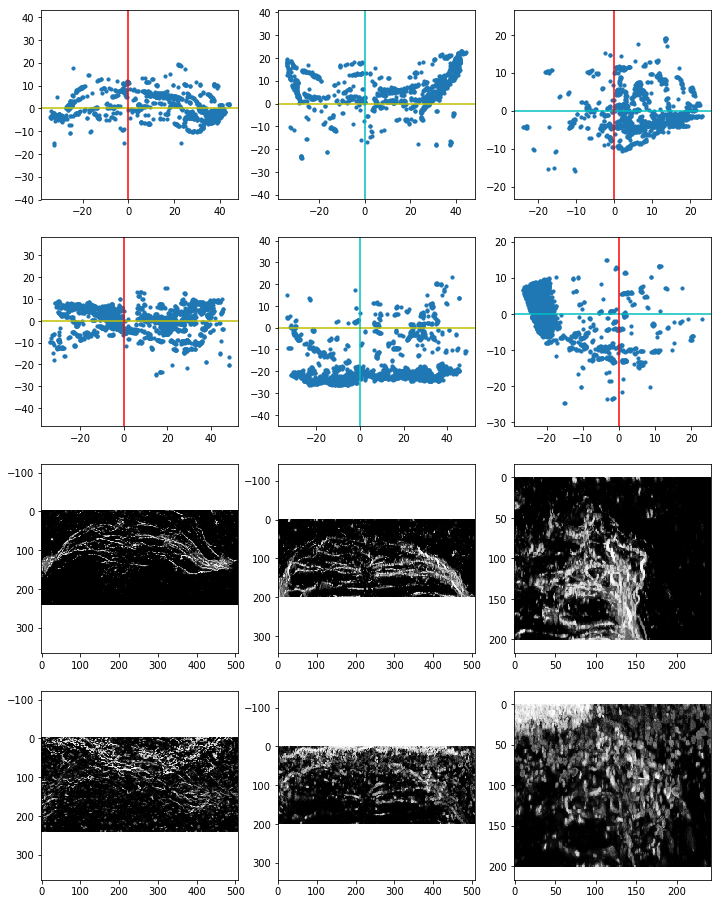

In [41]:
k,df,Ldf,ax = start('10')

In [42]:
pts = pick_pts(-32,18,0,-12,40,22)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

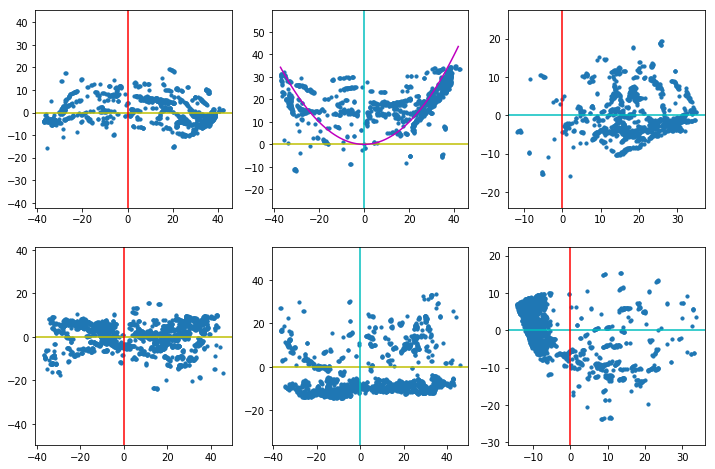

In [43]:
df1,Ldf1,mm,ax = ut.ch_vertex(df,Ldf,pts=pts)

In [44]:
model = save_model(k,mm,model)
save_both(k,df1,Ldf1[0])

Write to .\data\22hpf\Output-09-15\AT_10_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_10_22hpf.psi complete


# 7

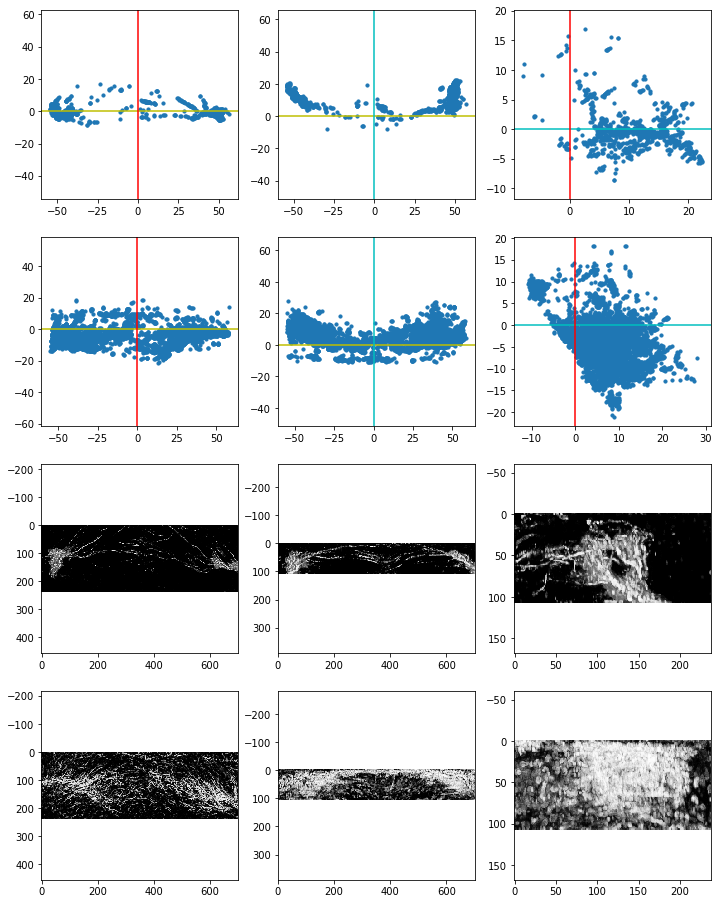

In [45]:
k,df,Ldf,ax = start('7')

In [46]:
mm = fit_model(ax[0,1],df)

In [47]:
model = save_model(k,mm,model)

In [48]:
save_both(k,df,Ldf[0])

Write to .\data\22hpf\Output-09-15\AT_7_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_7_22hpf.psi complete


# 1

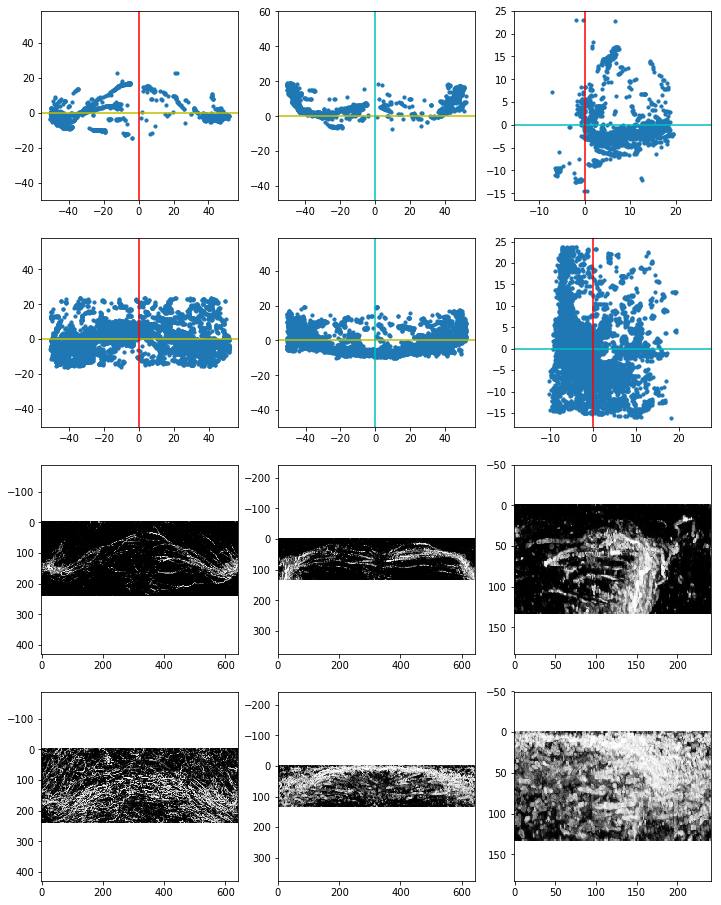

In [49]:
k,df,Ldf,ax = start('1')

In [50]:
mm = fit_model(ax[0,1],df)

In [51]:
pts = pick_pts(-48,15,0,-3,50,15)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

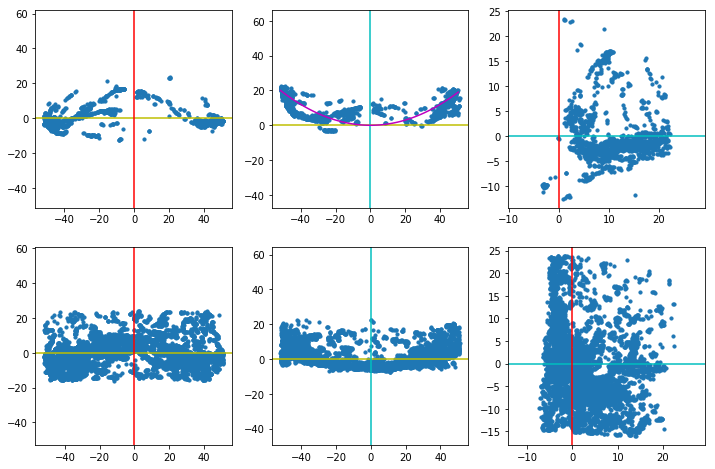

In [52]:
df1,Ldf1,mm,ax = ut.ch_vertex(df,Ldf,pts=pts)

In [53]:
model = save_model(k,mm,model)

In [54]:
save_both(k,df1,Ldf1[0])

Write to .\data\22hpf\Output-09-15\AT_1_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_1_22hpf.psi complete


# 13

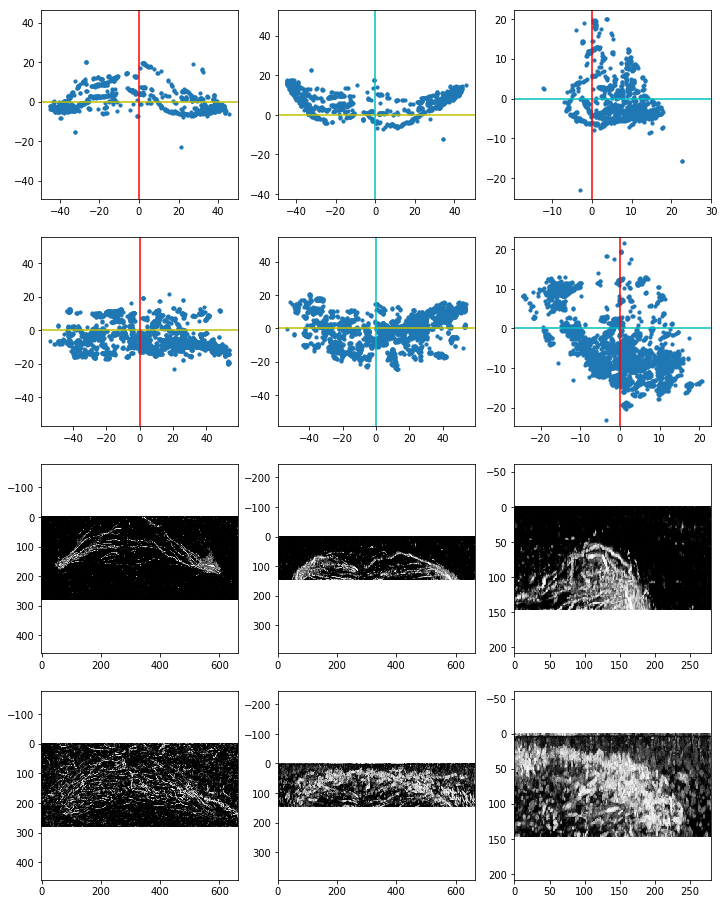

In [55]:
k,df,Ldf,ax = start('13')

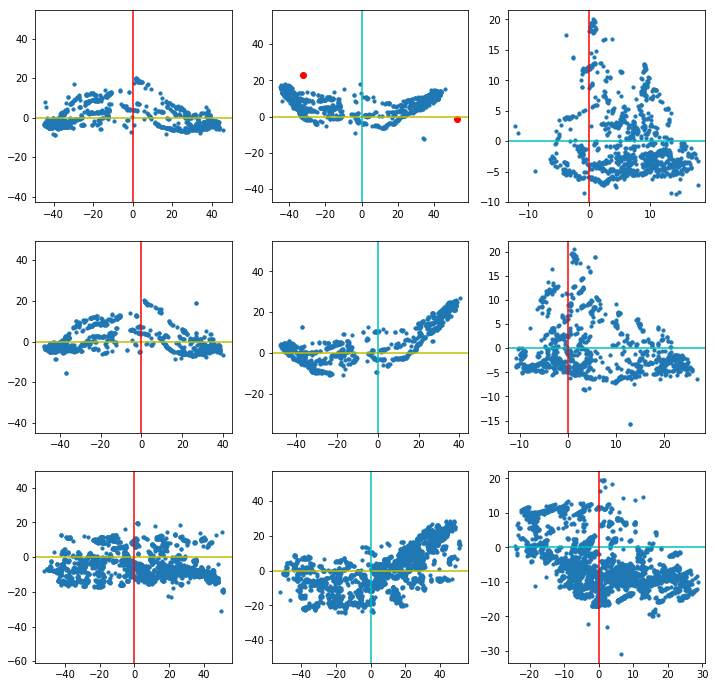

In [56]:
df1,Ldf1,pts,ax = ut.check_pts(df,Ldf,'z')

In [57]:
pts.iloc[0].x = -45
pts.iloc[0].z = 17
pts.iloc[1].x = 42
pts.iloc[1].z = 14
ax[0,1].scatter(pts.x,pts.z,c='y')
pts

x     z
0 -45.0  17.0
1  42.0  14.0

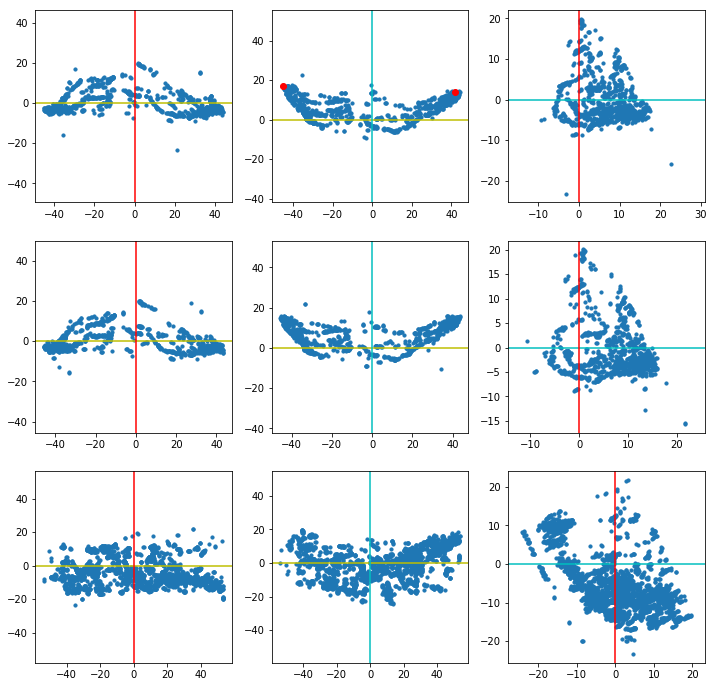

In [58]:
df2,Ldf2,ax = ut.revise_pts(df,Ldf,'z',pts=pts)

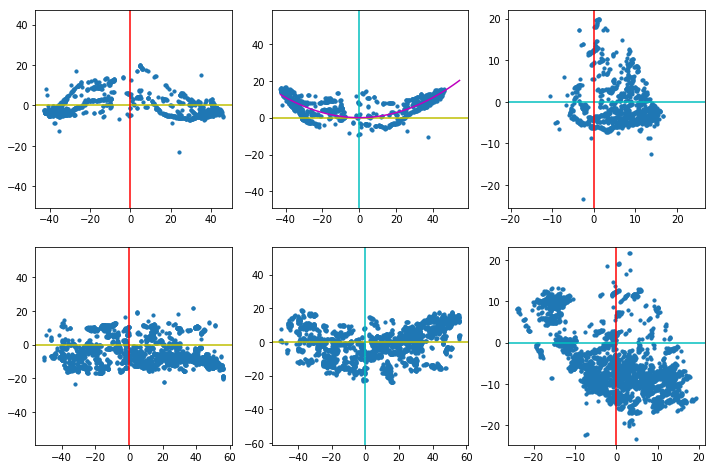

In [59]:
df3,Ldf3,mm,ax = ut.ch_vertex(df2,Ldf2)

In [60]:
pts = pick_pts(-39,16,0,-6,47,16)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

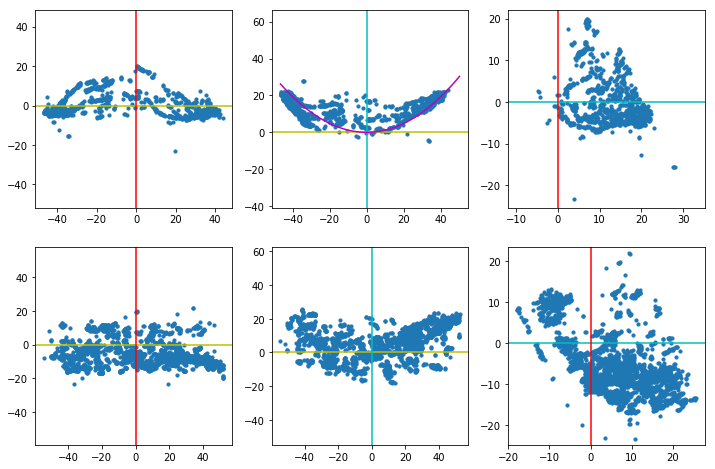

In [61]:
df4,Ldf4,mm,ax = ut.ch_vertex(df3,Ldf3,pts=pts)

In [62]:
model = save_model(k,mm,model)

In [63]:
save_both(k,df4,Ldf4[0])

Write to .\data\22hpf\Output-09-15\AT_13_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_13_22hpf.psi complete


# 2

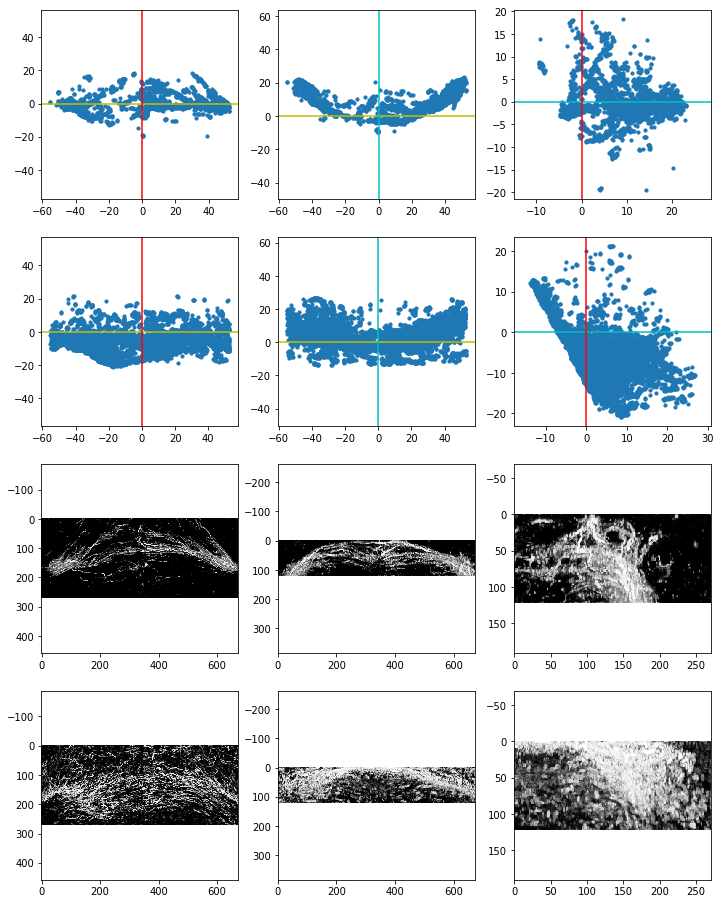

In [64]:
k,df,Ldf,ax = start('2')

In [65]:
mm = fit_model(ax[0,1],df)

In [66]:
model = save_model(k,mm,model)
save_both(k,df,Ldf[0])

Write to .\data\22hpf\Output-09-15\AT_2_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_2_22hpf.psi complete


# 12

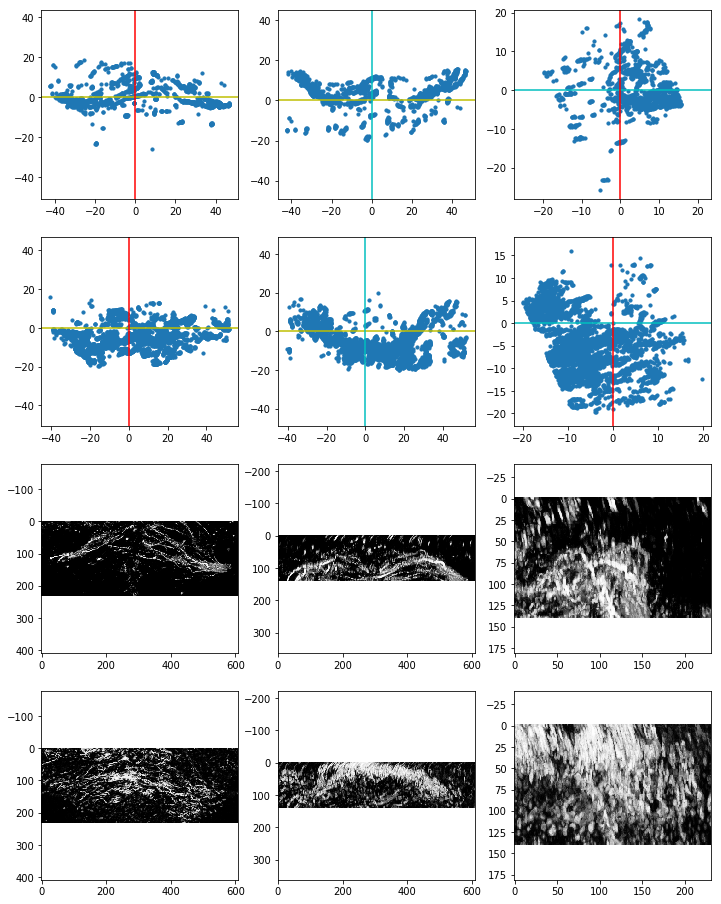

In [67]:
k,df,Ldf,ax = start('12')

In [68]:
mm = fit_model(ax[0,1],df)

In [69]:
pts = pick_pts(-36,14,0,-11,43,16)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

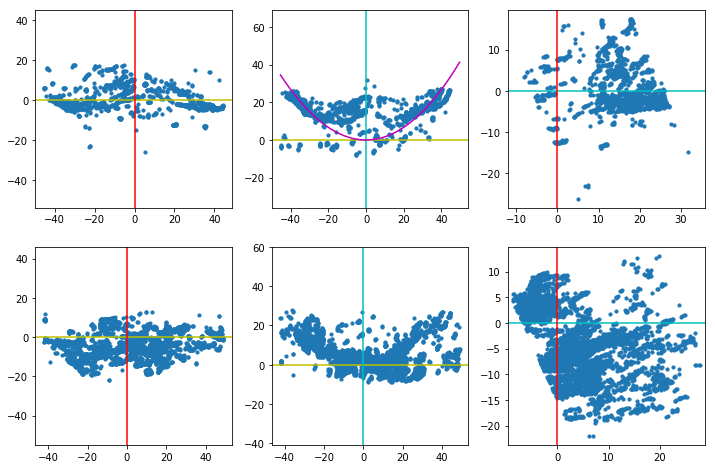

In [70]:
df1,Ldf1,mm,ax = ut.ch_vertex(df,Ldf,pts=pts)

In [71]:
model = save_model(k,mm,model)
save_both(k,df1,Ldf1[0])

Write to .\data\22hpf\Output-09-15\AT_12_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_12_22hpf.psi complete


# 4

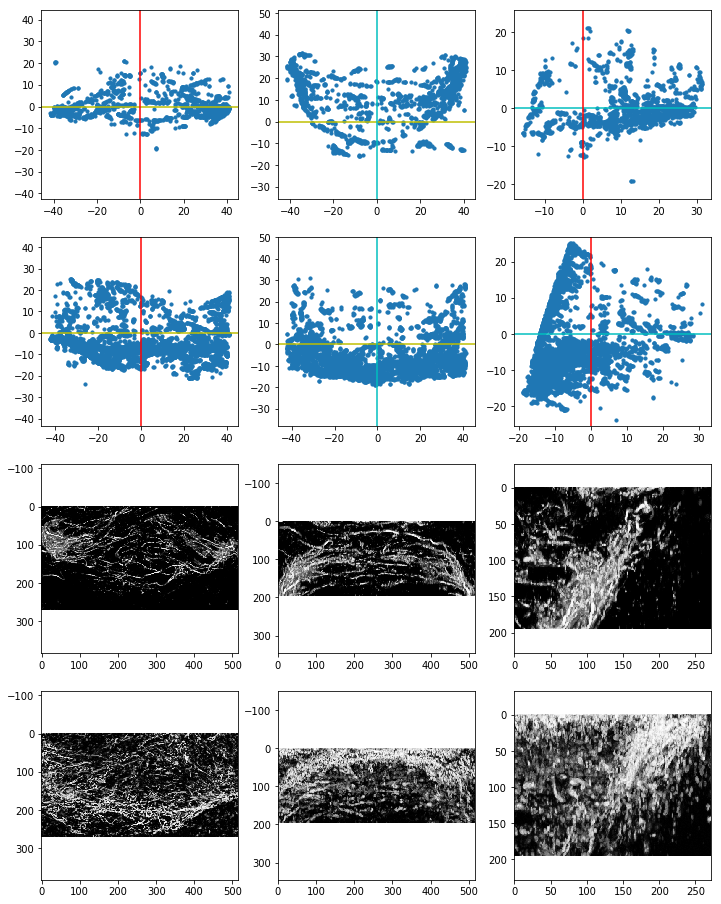

In [72]:
k,df,Ldf,ax = start('4')

In [73]:
pts = pick_pts(-38,28,0,-13,40,30)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

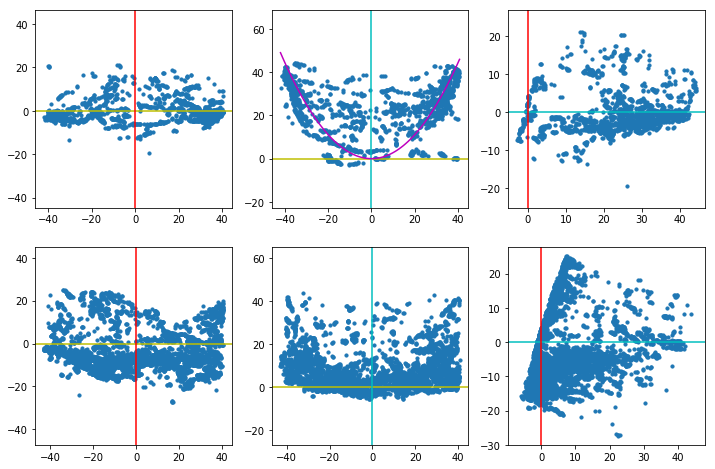

In [74]:
df1,Ldf1,mm,ax = ut.ch_vertex(df,Ldf,pts=pts)

In [75]:
model = save_model(k,mm,model)
save_both(k,df1,Ldf1[0])

Write to .\data\22hpf\Output-09-15\AT_4_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_4_22hpf.psi complete


# 9

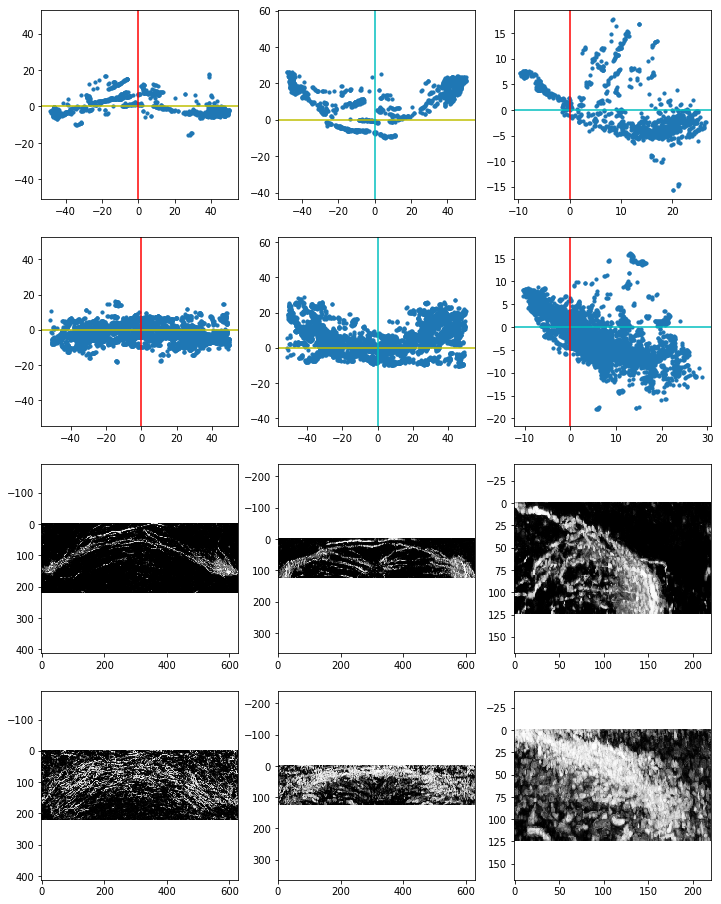

In [76]:
k,df,Ldf,ax = start('9')

In [77]:
mm = fit_model(ax[0,1],df)

In [78]:
model = save_model(k,mm,model)

In [79]:
save_both(k,df,Ldf[0])

Write to .\data\22hpf\Output-09-15\AT_9_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_9_22hpf.psi complete


# 5

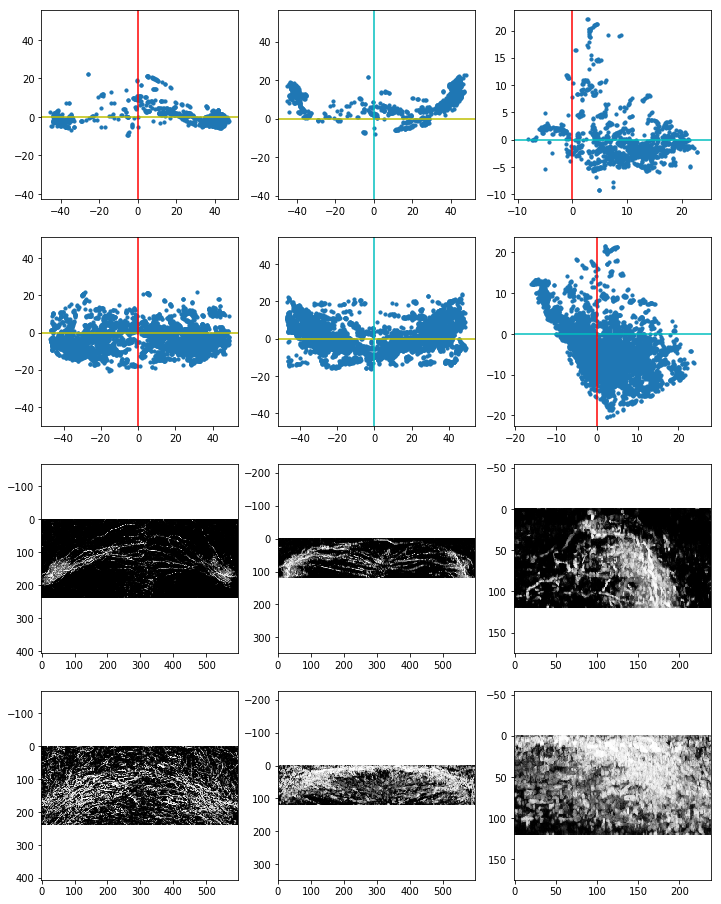

In [80]:
k,df,Ldf,ax = start('5')

In [81]:
mm = fit_model(ax[0,1],df)

In [82]:
model = save_model(k,mm,model)
save_both(k,df,Ldf[0])

Write to .\data\22hpf\Output-09-15\AT_5_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_5_22hpf.psi complete


# 3

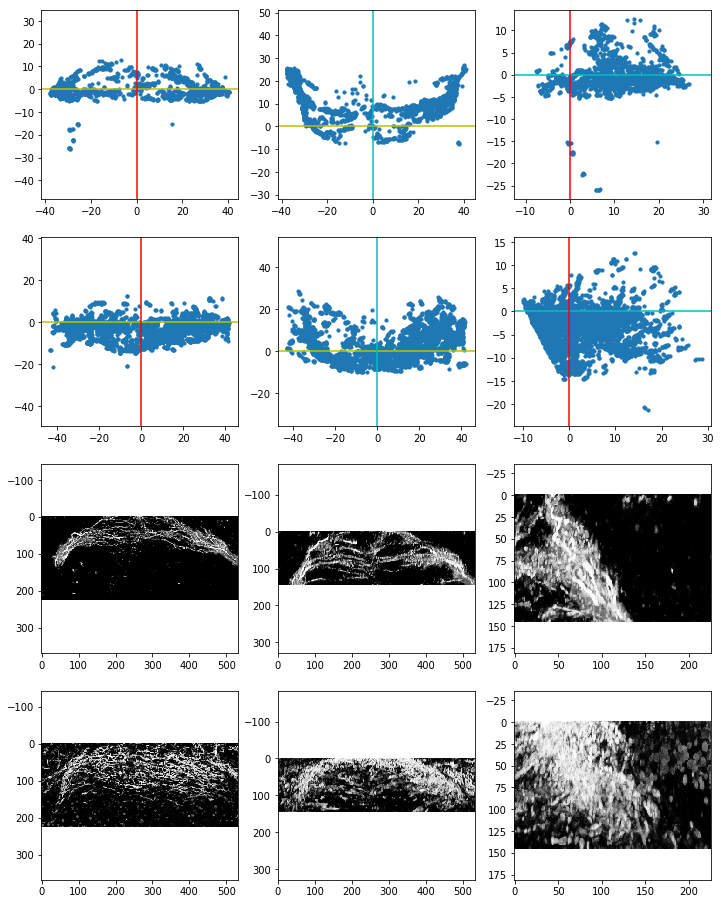

In [83]:
k,df,Ldf,ax = start('3')

In [84]:
mm = fit_model(ax[0,1],df)

In [85]:
pts = pick_pts(-36,22,0,-5,38,20)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

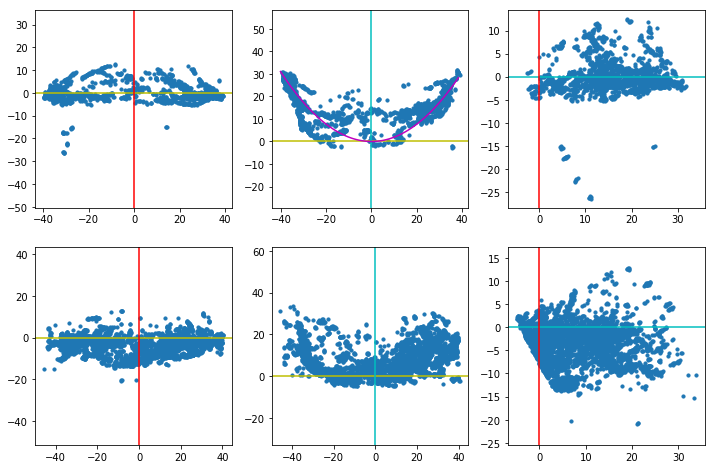

In [86]:
df1,Ldf1,mm,ax = ut.ch_vertex(df,Ldf,pts=pts)

In [87]:
model = save_model(k,mm,model)
save_both(k,df1,Ldf1[0])

Write to .\data\22hpf\Output-09-15\AT_3_22hpf.psi complete
Write to .\data\22hpf\Output-09-15\ZRF_3_22hpf.psi complete


In [88]:
model

a             b             c
14  0.015011  7.442408e-17 -5.864644e-15
8   0.005242 -1.504477e-16  2.311078e-14
6   0.011614 -8.318195e-17 -3.975859e-15
10  0.024826  1.920145e-17 -1.037776e-14
7   0.005284 -1.208995e-16  4.298055e-15
1   0.007500  9.491636e-17  2.051180e-15
13  0.012002  1.511626e-16  3.079346e-15
2   0.007366 -7.175444e-17  7.848694e-16
12  0.016739  2.391703e-17 -1.238302e-14
4   0.027615 -6.906357e-17 -8.116310e-15
9   0.009719 -7.102912e-16 -1.980932e-15
5   0.007165  9.423889e-16  4.467195e-14
3   0.019026  4.753098e-17  1.243870e-14

In [89]:
model.to_csv(os.path.join(outdir,'model.csv'))

In [90]:
outdir

'.\\data\\22hpf\\Output-09-15'